# MACHINE LEARNING PROJECT

## Installing Packages and Importing Libraries

In [19]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#importing libraries
import pandas as pd
import numpy as np
import xgboost as xgb

# Importing Regressor Models
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

#Importing metrics
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, f1_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score

from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

## Clustering

Below, we use the numerical data of players to cluster them into different homogenous groups based on physical attributes and performance in matches. This can be used to identify different groups of players with similar characteristics and the resulting clusters can also be used as a feature in the machine learning models

In [3]:
data_cleaned = pd.read_csv('/content/drive/MyDrive/MScA - UChicago/Assignments/Quarter 3 - Spring 2022/Machine Learning and Predictive Analytics/Project/Machine Learning Project/Final_Data_Modeling.csv')
print(data_cleaned.shape)
data_cleaned.head()

(8953, 116)


,Season_fifa,short_name,age,height_cm,weight_kg,club_name,league_name,overall,value_eur,wage_eur,preferred_foot,previous_edition_overall,POS,GP,MIN,ST,ON,OFF,Y,YR,R,G,A,SA,AOP,ASP,S,SOG,INT,CR,ACR,CC,BCC,CCOP,CCSP,BLK,TKL,TKLW,FC,FS,P,AP,ACRO,AW,BR,DR,DW,EG,ES,IBS,IBSOG,IBG,OBS,OBSOG,OBG,AOG,APW,DSP,OWN,TOUCH,TBOX,PFT,DL,AFZP,BLKCR,PENT,CLROL,POSL,LPOPP,PK,PKG,PKM,PKSVD,FKCR,FKACR,CRN,CRNCR,CRNW,FKS,FKSOG,FKG,GC,CS,SV,IBSV,OBSV,AKS,PKC,PKF,PKSV,CL,ECL,PUNCH,ALB,ATB,LMT,TOFF,BCM,BCS,ATTDR,posit_LW,posit_LM,posit_ST,posit_GK,posit_CB,posit_CM,posit_CDM,posit_CAM,posit_RM,posit_LB,posit_RW,posit_RB,posit_CF,posit_RWB,posit_LWB,num_player_positions
0,2015/16,Cristiano Ronaldo,31,185,80,98,4,94,87000000,575000,1,93,1,36,3183,36,0,2,0.000943,0.0,0.0,0.010996,0.003456,0.000314,0.003456,0.000000,0.071316,0.030789,0.002513,0.015080,0.002828,0.016023,0.004084,0.012253,0.000000,0.000943,0.003456,0.002513,0.006912,0.011938,0.267044,0.336161,0.002828,0.017593,0.015708,0.016023,0.048696,0.000000,0.000000,0.044926,0.020107,0.009425,0.026390,0.010682,0.001571,0.0,0.000000,0.013823,0.0,0.529375,0.0,0.122212,0.049010,0.214263,0.000000,0.024819,0.000314,0.131323,0.009739,0.002828,0.001885,0.000628,0.000314,0.000314,0.000000,0.000000,0.000000,0.014766,0.008168,0.002828,0.000314,0.009739,0.003456,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.004713,0.004713,0.000000,0.003770,0.000000,0.0,0.015708,0.008483,0.007540,0.028904,0.000314,0.000314,0.000314,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2015/16,L. Messi,29,170,72,44,4,93,89000000,575000,0,94,2,33,2728,31,2,2,0.001100,0.0,0.0,0.009531,0.005865,0.001833,0.005132,0.000733,0.057918,0.027493,0.002199,0.017595,0.005132,0.028226,0.013563,0.017595,0.003299,0.000000,0.004032,0.002566,0.004765,0.022361,0.551686,0.673754,0.001466,0.001833,0.026026,0.042889,0.071114,0.000000,0.000000,0.034091,0.019428,0.007331,0.023827,0.008065,0.002199,0.0,0.000000,0.027126,0.0,0.925953,0.0,0.290323,0.063783,0.466276,0.000000,0.111437,0.000000,0.219208,0.017962,0.002566,0.001100,0.000733,0.000733,0.004765,0.001466,0.012830,0.005865,0.018695,0.013930,0.004032,0.001466,0.008065,0.005132,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.042889,0.012463,0.0,0.003666,0.006598,0.006232,0.069648,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1
2,2015/16,M. Neuer,30,193,92,45,2,92,69500000,225000,1,90,3,34,3021,34,0,1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000662,0.297253,0.367759,0.000000,0.000993,0.095333,0.000331,0.001986,0.000331,0.000993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.466402,0.0,0.004634,0.000000,0.021185,0.000000,0.001655,0.000000,0.074148,0.021185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005296,0.006620,0.020854,0.013241,0.007613,0.00331,0.0,0.000662,0.0,0.005296,0.003310,0.002648,0.059252,0.000000,0.0,0.000000,0.000000,0.000000,0.000331,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1
3,2015/16,L. Suárez,29,182,85,44,4,92,83000000,525000,1,90,1,35,3150,35,0,0,0.001905,0.0,0.0,0.012698,0.005079,0.000317,0.004762,0.000317,0.043492,0.022222,0.002540,0.010794,0.001270,0.017778,0.006667,0.012381,0.000000,0.000635,0.007302,0.005714,0.013016,0.018730,0.214921,0.293968,0.001270,0.004762,0.021587,0.013016,0.043175,0.000000,0.000317,0.038413,0.021587,0.012698,0.005079,0.000635,0.000000,0.0,0.000317,0.013651,0.0,0.485397,0.0,0.111111,0.059365,0.186667,0.000317,0.026984,0.000000,0.157460,0.017143,0.001587,0.000952,0.000000,0.000635,0.000000,0.000000,0.000000,0.000000,0.012381,0.000317,0.000000,0.000000,0.008571,0.005397,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.005714,0.005714,0.000000,0.007302,0.001587,0.0,0.018730,0.009206,0.010794,0.037143,0.000000,0.000000,0.000317,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2015/16,Neymar,24,174,68,44,4,92,10

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_cleaned['Season_fifa'].value_counts()

2019/20    1589
2020/21    1522
2018/19    1491
2017/18    1489
2016/17    1467
2015/16    1395
Name: Season_fifa, dtype: int64

In [5]:
pd.DataFrame(data_cleaned.columns)

,0
0,Season_fifa
1,short_name
2,age
3,height_cm
4,weight_kg
5,club_name
6,league_name
7,overall
8,value_eur
9,wage_eur


To come up with the best possible number of clusters, we try a range of clusters between 40 and 210 and determine the optimal number of clusters using the elbow method

In [6]:
dfcluster = data_cleaned.drop(['Season_fifa','overall','short_name'], axis=1)

from sklearn.cluster import KMeans

clusters = [40,50,60,70,80,90,100,110,120,130,140,150, 170, 180, 190, 200, 210]
score = []
for i in clusters:
  kmeans = KMeans(n_clusters=i, random_state=0).fit(dfcluster)
  print(kmeans.score(dfcluster))
  score.append(abs(kmeans.score(dfcluster)))

-2014946479372785.5
-1275491039835007.0
-891855418000822.1
-602139745998439.4
-419615010826740.6
-302731589437435.5
-219945055190215.2
-168217701468146.22
-129419903867612.0
-99543140272498.03
-74972340892522.47
-56499410425468.75
-34987968347178.668
-26634628594748.742
-20999211142843.062
-17179506743672.662
-14132898437283.613


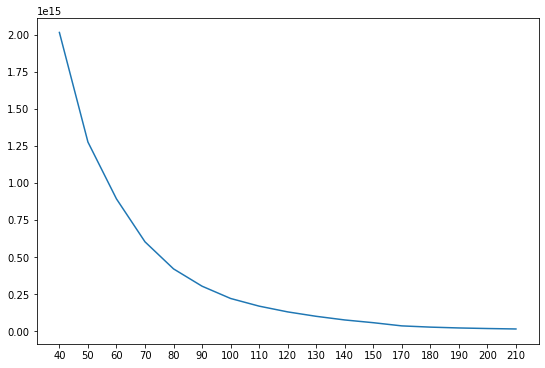

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))

ax.set_xticks(range(len(clusters)))

ax.set_xticklabels(clusters)
ax.plot(score)

From the above graph, we conclude that 110 is the best cluster number as the loss does not decrease significantly post this.

In [8]:
kmeans = KMeans(n_clusters=110, random_state=0).fit(dfcluster)
kmeans.labels_

array([74,  7, 88, ..., 78, 78, 78], dtype=int32)

In [10]:
data_cleaned['clusters'] = kmeans.labels_

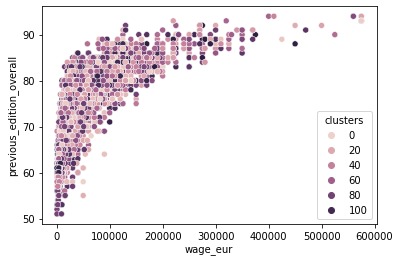

In [11]:
import seaborn as sns

sns.scatterplot(data=data_cleaned, x='wage_eur', y='previous_edition_overall', hue='clusters')

Due to the high number of clusters, we cannot see a clear distinction of the clusters. Therefore, we will apply PCA to reduce the number of dimensions of the data and then visualise the clusters

# Applying PCA to visualise clusters

In [12]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler

In [13]:
pca_2d = PCA(n_components=2)

In [14]:
PCs_2d = pd.DataFrame(pca_2d.fit_transform(data_cleaned.drop(['Season_fifa',"clusters", "overall", "short_name"], axis=1)))

In [15]:
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_2d['clusters'] = kmeans.labels_

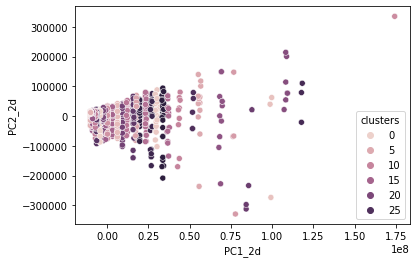

In [16]:
#visualising the first 30 clusters
sns.scatterplot(data=PCs_2d[PCs_2d['clusters'].isin(list(range(0,30)))], x='PC1_2d', y='PC2_2d', hue='clusters')

In [17]:
pca_2d.explained_variance_ratio_.cumsum()

array([0.99999559, 1.        ])

After reducing the features of the data to just two dimensions, we can visualise the first 30 clusters on this graph. The first two Principal Components also capture 99% of the variability of the data and therefore, this is a good representation of the entire data.

From the above graph, we can clearly see a start distinction between the first 30 clusters

# Running Models

## Splitting the data

We will split the data into train and test based on the seasons. We will keep the players of FIFA 22, i.e players in the season 2020/21.

We will be using the season 2020/21 as test data and everything prior to that as Train. This is in line with our business value of the project where the features of players from all of the previous seasons will be used to determine the fifa rating for the current season.

In [25]:
test1= data_cleaned[data_cleaned['Season_fifa']=='2020/21']
train1= data_cleaned[data_cleaned['Season_fifa']!='2020/21']

In [23]:
print(test1.shape, train1.shape)

(1522, 117) (7431, 117)


## Creating functions to execute the different models

We create two functions to help with running multiple models simultaneously and produce a summary of the best RMSE and R-squared scores from each model.

The first function "execute_regressor_model" runs a K-fold cross validation using the input model on the train data and produces the RMSE and R-squared scores.
The second function "model_summary" creates runs the first function in a loop for all the models and generates a summary of the results from each model.

In [18]:
from sklearn.model_selection import RepeatedKFold

def execute_regressor_model(model, auc=False):
    cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
    r2_score = cross_val_score(model, X, y, cv=cv, scoring='r2').mean()
    rmse = -cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error').mean()
    return r2_score, rmse
  
def model_summary(models):
  summary = pd.DataFrame(columns = ["Model", "R2 Score", "RMSE"])
  for i in models:
    r2_score, rmse = execute_regressor_model(i)
    summary = summary.append({
        "Model": type(i).__name__,
        "R2 Score": r2_score,
        "RMSE": rmse
    }, ignore_index = True)
    summary=summary.sort_values(by=['R2 Score'], ascending=False)
  
  return summary

For our final modelling, we run multiple trainings with different sections of the our entire dataset. This helps us with identifying which features are the most important in determining the FIFA ratings.

## Feature Importance

Before we start with our modelling, we want to understand the importance of the different features we have in our data. We fit a Decision Tree Model on our entire data and plot the feature importance

In [30]:
X = train1.drop(['Season_fifa', 'overall', 'short_name'], axis=1)
y = train1['overall']

model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

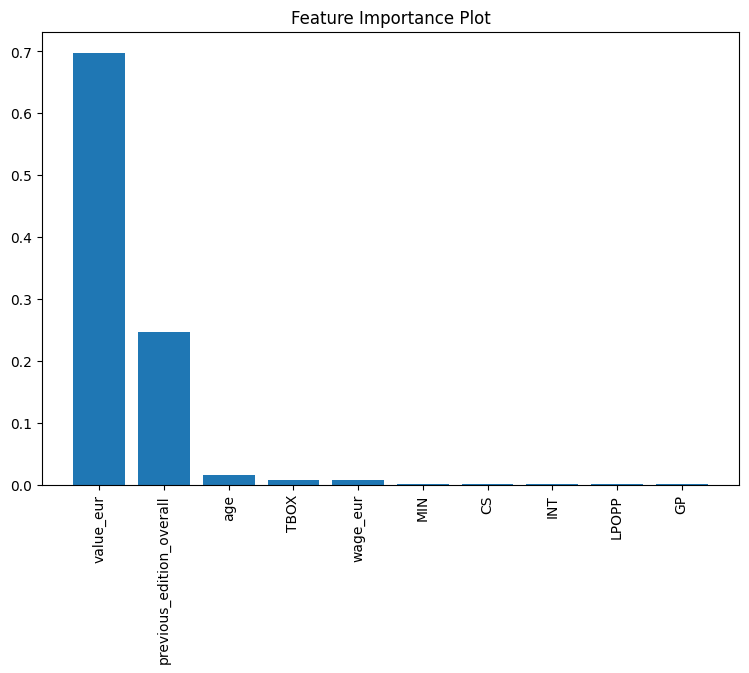

In [42]:
# importance = pd.DataFrame([train1.columns, model.feature_importances_], columns = ['Features', 'Importance'])
importance = pd.DataFrame(columns = ['Features', 'Importance'])
importance['Features'] = X.columns
importance['Importance'] = model.feature_importances_
# importance.head()

Top10 = importance.sort_values(by = 'Importance', ascending = False)[:10]

fig, ax = plt.subplots(figsize = (9,6), dpi=100)

ax.bar(Top10['Features'], Top10['Importance'])
ax.set_xticklabels(Top10['Features'], rotation = 90)
ax.set_title("Feature Importance Plot");


From the above graph, we can see that "Value_eur" and "Previous Edition Overall" are the most important features in the data

## Data 1 - All Players

Section 1: We use data from all players in this section for training our Machine Learning models.

### 1.a. Using All features

Section 1.a: We use all features such as club names, league names, physical attributes, game attributes, etc for predicting the FIFA ratings

In [ ]:
%%time
train_1a= train1.copy(deep=True)
test_1a= test1.copy(deep=True)

X = train_1a.drop(['Season_fifa', 'overall', 'short_name'], axis=1)
y = train_1a['overall']

model_summary([RandomForestRegressor(), 
               xgb.XGBRegressor(objective = 'reg:squarederror'), 
               LinearRegression(), 
               DecisionTreeRegressor()])

CPU times: user 41.5 s, sys: 1.54 s, total: 43 s
Wall time: 24.2 s


,Model,R2 Score,RMSE
0,XGBRegressor,0.969499,0.974989
1,RandomForestRegressor,0.967215,1.019874
3,DecisionTreeRegressor,0.922056,1.554888
2,LinearRegression,0.886100,1.884284


We see that XGBRegressor performs the best. Hence we will fit it on the entire train dataset and then use it to predict overalls for the test dataset

In [ ]:
model_1a= xgb.XGBRegressor(objective = 'reg:squarederror')
model_1a.fit(X, y)
test_1a['Overall_Predicted']=model_1a.predict(test_1a.drop(['Season_fifa', 'overall', 'short_name'], axis=1))
test_1a['Overall_Predicted']=test_1a['Overall_Predicted'].apply(lambda x: round(x))

In [ ]:
test_1a[['short_name','overall', 'Overall_Predicted']].sort_values(by=['overall'], ascending=False).head(10)

,short_name,overall,Overall_Predicted
5034,R. Lewandowski,92,91
5037,J. Oblak,91,91
5035,Cristiano Ronaldo,91,92
5036,K. De Bruyne,91,91
5038,H. Kane,90,90
5039,K. Benzema,89,91
5040,T. Courtois,89,89
5041,V. van Dijk,89,87
5042,M. Salah,89,90
5043,Ederson,89,89


The above table compares the actual rakings (overall) with the predicted ratings (Overall_Predicted) and we can see a that our model performs very well with only a +/-1 difference from the actual ratings

### 1.b. Physical Attributes, Game attributes, wage, value

**Section 1.b:**

We remove features such as club name, league name, preferred foot and the previous rakings from our training for this section as these are subjective.

We wanted to run one model with just the attributes which relate to the competency of thep players

In [ ]:
%%time

cols = [0,1,5,6,7,10,11, 115]

train_1b= train1.copy(deep=True)
test_1b= test1.copy(deep=True)

X = train_1b.drop(train_1b.columns[cols], axis=1)
y = train_1b['overall']

model_summary([RandomForestRegressor(), 
               xgb.XGBRegressor(objective = 'reg:squarederror'), 
               LinearRegression(), 
               DecisionTreeRegressor()])

CPU times: user 41.4 s, sys: 2.01 s, total: 43.4 s
Wall time: 23.4 s


,Model,R2 Score,RMSE
0,XGBRegressor,0.964813,1.047297
1,RandomForestRegressor,0.960984,1.103227
3,DecisionTreeRegressor,0.922650,1.580112
2,LinearRegression,0.706883,3.022020


We see that XGBRegressor performs the best. Hence we will fit it on the entire train dataset and then use it to predict overalls for the test dataset

In [ ]:
model_1b= xgb.XGBRegressor(objective = 'reg:squarederror')
model_1b.fit(X, y)
test_1b['Overall_Predicted']=model_1b.predict(test_1b.drop(test_1b.columns[cols], axis=1))
test_1b['Overall_Predicted']=test_1b['Overall_Predicted'].apply(lambda x: round(x))

In [ ]:
test_1b[['short_name','overall', 'Overall_Predicted']].sort_values(by=['overall'], ascending=False).head(10)

,short_name,overall,Overall_Predicted
5034,R. Lewandowski,92,89
5037,J. Oblak,91,90
5035,Cristiano Ronaldo,91,93
5036,K. De Bruyne,91,91
5038,H. Kane,90,88
5039,K. Benzema,89,90
5040,T. Courtois,89,90
5041,V. van Dijk,89,89
5042,M. Salah,89,89
5043,Ederson,89,89


we can see from the above table that the subjective features removed do not impact the performance of the model greatly and we still get decent predicted ratings for the top 10 players

### 1.c. Physical and Game Attributes

**Section 1.c:**

The last model that we run is after keeping only the physical and game attributes of the player and we remove the wage and value of the players. This is again done to solely use the features which are related to the individual player's performance.

In [ ]:
%%time

cols = [0,1,5,6,7,8,9,10,11, 115]

train_1c= train1.copy(deep=True)
test_1c= test1.copy(deep=True)

X = train_1c.drop(train_1c.columns[cols], axis=1)
y = train_1c['overall']

model_summary([RandomForestRegressor(), 
               xgb.XGBRegressor(objective = 'reg:squarederror'), 
               LinearRegression(), 
               DecisionTreeRegressor()])

CPU times: user 45.7 s, sys: 2.13 s, total: 47.9 s
Wall time: 27.8 s


,Model,R2 Score,RMSE
0,XGBRegressor,0.783528,2.596942
1,RandomForestRegressor,0.683817,3.157710
2,LinearRegression,0.382275,4.386074
3,DecisionTreeRegressor,0.310687,4.658138


We do notice that the accuracy of all the models have dropped significantly after removing the wage and the value of the players

We see that RandomForestRegressor performs the best. Hence we will fit it on the entire train dataset and then use it to predict overalls for the test dataset

In [ ]:
model_1c= RandomForestRegressor()
model_1c.fit(X, y)
test_1c['Overall_Predicted']=model_1c.predict(test_1c.drop(test_1c.columns[cols], axis=1))
test_1c['Overall_Predicted']=test_1c['Overall_Predicted'].apply(lambda x: round(x))

In [ ]:
test_1c[['short_name','overall', 'Overall_Predicted']].sort_values(by=['overall'], ascending=False).head(10)

,short_name,overall,Overall_Predicted
5034,R. Lewandowski,92,85
5037,J. Oblak,91,88
5035,Cristiano Ronaldo,91,88
5036,K. De Bruyne,91,86
5038,H. Kane,90,86
5039,K. Benzema,89,88
5040,T. Courtois,89,87
5041,V. van Dijk,89,76
5042,M. Salah,89,88
5043,Ederson,89,87


As expected the predicted ratings of the players are now within +/-5 range of the actual ratings and the performance has dropped significantly.

This shows that wage and value of the player are important factors in determining the FIFA ratings of the platers

## Data 2 - Players who have played more than 10 games

In this section, we filter only players who have played more than 10 games in a season. This is mainly done to remove outlier performance by players. Players can have spurts of good play in football games but their performance ix expected to average out over a longer period.

So to remove any outlier performance by players, we only consider players who have played a longer duration in the entire dataset and the performance is not biased by lesser games played.

Below We run all the similar models as decribed in section 1 but with our new filtered dataset which has only players who have played more than 10 games.

We see that performance of the models on the new dataset is very similar to what we saw in Section 1

In [ ]:
df2 = data_cleaned[data_cleaned['GP']>10]

In [ ]:
df2.shape

(4755, 117)

In [ ]:
test2= df2[df2['Season_fifa']=='2020/21']
train2= df2[df2['Season_fifa']!='2020/21']

In [ ]:
print(test2.shape, train2.shape)

(861, 117) (3894, 117)


### 2.a. All data

In [ ]:
%%time

train_2a= train2.copy(deep=True)
test_2a= test2.copy(deep=True)

X = train_2a.drop(['Season_fifa', 'overall', 'short_name'], axis=1)
y = train_2a['overall']

model_summary([RandomForestRegressor(), 
               xgb.XGBRegressor(objective = 'reg:squarederror'), 
               LinearRegression(), 
               DecisionTreeRegressor()])

CPU times: user 33.9 s, sys: 1.56 s, total: 35.5 s
Wall time: 19.3 s


,Model,R2 Score,RMSE
0,RandomForestRegressor,0.953078,0.990959
1,XGBRegressor,0.952773,0.994141
3,DecisionTreeRegressor,0.889099,1.534733
2,LinearRegression,0.884589,1.555499


We see that XGBRegressor performs the best. Hence we will fit it on the entire train dataset and then use it to predict overalls for the test dataset

In [ ]:
model_2a= xgb.XGBRegressor(objective = 'reg:squarederror')
model_2a.fit(X, y)
test_2a['Overall_Predicted']=model_2a.predict(test_2a.drop(['Season_fifa', 'overall', 'short_name'], axis=1))
test_2a['Overall_Predicted']=test_2a['Overall_Predicted'].apply(lambda x: round(x))

In [ ]:
test_2a[['short_name','overall', 'Overall_Predicted']].sort_values(by=['overall'], ascending=False).head(10)

,short_name,overall,Overall_Predicted
5034,R. Lewandowski,92,91
5036,K. De Bruyne,91,91
5037,J. Oblak,91,90
5035,Cristiano Ronaldo,91,90
5038,H. Kane,90,89
5039,K. Benzema,89,91
5040,T. Courtois,89,90
5042,M. Salah,89,90
5043,Ederson,89,89
5044,G. Donnarumma,89,87


### 2.b Physical Attributes, Game Attributes, Values and Wages

In [ ]:
%%time

cols = [0,1,5,6,7,10,11, 115]

train_2b= train2.copy(deep=True)
test_2b= test2.copy(deep=True)

X = train_2b.drop(train_2b.columns[cols], axis=1)
y = train_2b['overall']

model_summary([RandomForestRegressor(), 
               xgb.XGBRegressor(objective = 'reg:squarederror'), 
               LinearRegression(), 
               DecisionTreeRegressor()])

CPU times: user 33.7 s, sys: 1.71 s, total: 35.4 s
Wall time: 18.6 s


,Model,R2 Score,RMSE
0,RandomForestRegressor,0.948180,1.043480
1,XGBRegressor,0.947896,1.043987
3,DecisionTreeRegressor,0.872016,1.564354
2,LinearRegression,0.763082,2.228720


We see that RandomForestRegressor performs the best. Hence we will fit it on the entire train dataset and then use it to predict overalls for the test dataset

In [ ]:
model_2b= RandomForestRegressor()
model_2b.fit(X, y)
test_2b['Overall_Predicted']=model_2b.predict(test_2b.drop(test_2b.columns[cols], axis=1))
test_2b['Overall_Predicted']=test_2b['Overall_Predicted'].apply(lambda x: round(x))

In [ ]:
test_2b[['short_name','overall', 'Overall_Predicted']].sort_values(by=['overall'], ascending=False).head(10)

,short_name,overall,Overall_Predicted
5034,R. Lewandowski,92,90
5036,K. De Bruyne,91,90
5037,J. Oblak,91,90
5035,Cristiano Ronaldo,91,87
5038,H. Kane,90,89
5039,K. Benzema,89,89
5040,T. Courtois,89,90
5042,M. Salah,89,89
5043,Ederson,89,90
5044,G. Donnarumma,89,86


### 2.c Physical and Game Attributes

In [ ]:
%%time

cols = [0,1,5,6,7,8,9,10,11, 115]

train_2c= train2.copy(deep=True)
test_2c= test2.copy(deep=True)

X = train_2c.drop(train_2c.columns[cols], axis=1)
y = train_2c['overall']

model_summary([RandomForestRegressor(), 
               xgb.XGBRegressor(objective = 'reg:squarederror'), 
               LinearRegression(), 
               DecisionTreeRegressor()])

CPU times: user 36 s, sys: 1.42 s, total: 37.4 s
Wall time: 21.8 s


,Model,R2 Score,RMSE
0,XGBRegressor,0.671195,2.623290
1,RandomForestRegressor,0.583773,2.949316
2,LinearRegression,0.546648,3.082903
3,DecisionTreeRegressor,0.174295,4.124433


We see that RandomForestRegressor performs the best. Hence we will fit it on the entire train dataset and then use it to predict overalls for the test dataset

In [ ]:
model_2c= RandomForestRegressor()
model_2c.fit(X, y)
test_2c['Overall_Predicted']=model_2c.predict(test_2c.drop(test_2c.columns[cols], axis=1))
test_2c['Overall_Predicted']=test_2c['Overall_Predicted'].apply(lambda x: round(x))

In [ ]:
test_2c[['short_name','overall', 'Overall_Predicted']].sort_values(by=['overall'], ascending=False).head(10)

,short_name,overall,Overall_Predicted
5034,R. Lewandowski,92,85
5036,K. De Bruyne,91,86
5037,J. Oblak,91,88
5035,Cristiano Ronaldo,91,89
5038,H. Kane,90,86
5039,K. Benzema,89,88
5040,T. Courtois,89,87
5042,M. Salah,89,88
5043,Ederson,89,88
5044,G. Donnarumma,89,84
